<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/Perceptron_para_regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron para regressão linear

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs


In [ ]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, 
                                     x1_max+1,100), np.linspace(x2_min-1, 
                                                                x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh < 0.5, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

(100, 2) (100,)


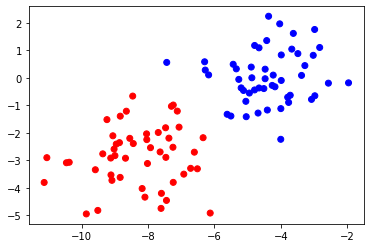

In [ ]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2500)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

step 0: 28
step 30: 9
step 60: 0
step 90: 0
step 120: 0
step 150: 0
step 180: 0
step 210: 0
step 240: 0
step 270: 0
step 300: 0
step 330: 0
step 360: 0
step 390: 0
step 420: 0
step 450: 0
step 480: 0
w:  [-0.81131383 -1.62080506]
b:  -7.03901970344543


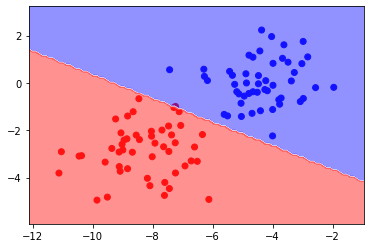

In [ ]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*np.random.random()-1

learning_rate=0.08

for step in range(501):
    cost = 0
    for x_n, y_n in zip(x,y):
        y_pred = np.dot(x_n, w) + b 
        y_pred = 1 if y_pred > 0 else 0
        error = y_n - y_pred
        w = w + learning_rate*np.dot(np.squeeze(error), np.squeeze(x_n)) 
        b = b + learning_rate*error
        cost += error**2
        
    if step%30 == 0:
        print('step {0}: {1}'.format(step, cost))
      
print('w: ', w)
print('b: ', b)
plot_linear_classifier(x, y, w, b)